In [1]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import KeyedVectors

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
import scikitplot as skplt

#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

import csv

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve



Using TensorFlow backend.


In [2]:
import pickle

In [3]:
%run custom_functions_test.ipynb

In [4]:
with open('data/cleaned-reshuffled.pkl', 'rb') as f:
	df = pickle.load(f)

In [5]:
df.head()

,id,label,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,29727,0,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre #engrus...,sad to see the scenes of hooligans pre engrus ...,"[sad, to, see, the, scenes, of, hooligans, pre...","[sad, to, see, the, scene, of, hooligan, pre, ...","[sad, to, see, the, scene, of, hooligan, pre, ...",sad to see the scenes of hooligans pre engrus ...,sad to see the scenes of hooligans pre engrus ...
1,14466,0,#gooddyeyoung #yoyoyo !! super happy to be ap...,#gooddyeyoung #yoyoyo super happy to be apa of...,gooddyeyoung yoyoyo super happy to be apa of t...,"[gooddyeyoung, yoyoyo, super, happy, to, be, a...","[gooddyeyoung, yoyoyo, super, happi, to, be, a...","[gooddyeyoung, yoyoyo, super, happy, to, be, a...",gooddyeyoung yoyoyo super happy to be apa of t...,gooddyeyoung yoyoyo super happy to be apa of t...
2,18194,0,queen evil's bihdayð#lnic #lnicjustanevilbd...,queen evil s bihday #lnic #lnicjustanevilbday ...,queen evil s bihday lnic lnicjustanevilbday bi...,"[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...","[queen, evil, s, bihday, lnic, lnicjustanevilb...",queen evil s bihday lnic lnicjustanevilbday bi...,queen evil s bihday lnic lnicjustanevilbday bi...
3,18283,1,@user you might be a libtard if... #libtard #...,you might be a libtard if #libtard #sjw #liber...,you might be a libtard if libtard sjw liberal ...,"[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...","[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,you might be a libtard if libtard sjw liberal ...
4,25845,0,what are your goals? find out here... #smile...,what are your goals find out here #smile,what are your goals find out here smile,"[what, are, your, goals, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]","[what, are, your, goal, find, out, here, smile]",what are your goals find out here smile,what are your goals find out here smil


## Train / Val / Test Split

In [6]:
X = df.drop(['label'], axis = 1)

In [7]:
y = df['label']

In [8]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y, test_size=0.20, random_state=123)

In [9]:
#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, stratify = y_model, test_size=0.20, random_state=123)

## Comparing Vectorization and Method Performance

In [10]:
count_vect = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=.001)
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), min_df=.001)
tfidf_ngram2 = TfidfVectorizer(ngram_range=(2,3),min_df=.001)

logreg = LogisticRegression(random_state=10)
rfc = RandomForestClassifier(random_state=10)
nb = MultinomialNB()
svc = SVC(random_state=10)

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('TFIDF_VECTORIZER', tfidf_vectorizer),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram),
                      ('TFIDF_NGRAM_2_3', tfidf_ngram2)]



## Multinomial Naive Bayes

In [ ]:
np.random.seed(0)

In [36]:
nb_results1 = compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), vectorization_list)

nb_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.97,0.94,0.94,0.93
Train F1,0.74,0.36,0.37,0.14
Train Precision,0.83,0.90,0.91,0.89
Train Recall,0.66,0.23,0.23,0.08
Validation Accuracy,0.96,0.94,0.94,0.93
Validation F1,0.60,0.36,0.35,0.13
Validation Precision,0.86,0.89,0.86,0.87
Validation Recall,0.46,0.22,0.22,0.07


In [ ]:
nb_results1.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [21]:
nb_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'upsample')
nb_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.97,0.90,0.91,0.77
Train F1,0.97,0.90,0.91,0.73
Train Precision,0.96,0.90,0.91,0.89
Train Recall,0.99,0.91,0.90,0.61
Validation Accuracy,0.92,0.89,0.90,0.88
Validation F1,0.57,0.51,0.53,0.35
Validation Precision,0.45,0.37,0.40,0.29
Validation Recall,0.79,0.81,0.78,0.45


In [ ]:
nb_results3.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [22]:
nb_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'downsample')
nb_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.97,0.92,0.93,0.81
Train F1,0.97,0.92,0.93,0.78
Train Precision,0.97,0.92,0.94,0.92
Train Recall,0.98,0.92,0.93,0.68
Validation Accuracy,0.84,0.85,0.86,0.84
Validation F1,0.44,0.45,0.45,0.32
Validation Precision,0.29,0.31,0.31,0.23
Validation Recall,0.89,0.86,0.83,0.53


In [ ]:
nb_results4.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

In [23]:
nb_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, MultinomialNB(), 
                                    vectorization_list, sampling = 'smote')
nb_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.96,0.88,0.88,0.83
Train F1,0.76,0.50,0.51,0.27
Train Precision,0.68,0.35,0.35,0.19
Train Recall,0.85,0.89,0.90,0.44
Validation Accuracy,0.95,0.87,0.87,0.83
Validation F1,0.64,0.46,0.46,0.22
Validation Precision,0.60,0.32,0.32,0.16
Validation Recall,0.67,0.81,0.79,0.36


In [ ]:
nb_results5.to_csv('data/NB_results.csv', mode = 'a', header ='column_names')

## Logistic Regression

In [15]:
%run custom_functions_test.ipynb

In [13]:
#Logistic Regression: compare vectorizers with no presets
lr_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', random_state = 10), 
                                            vectorization_list)

lr_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.95,0.95,0.93
Train F1,0.89,0.47,0.47,0.14
Train Precision,0.99,0.88,0.89,0.96
Train Recall,0.80,0.32,0.32,0.08
Validation Accuracy,0.96,0.95,0.95,0.93
Validation F1,0.64,0.48,0.45,0.13
Validation Precision,0.85,0.89,0.85,0.87
Validation Recall,0.51,0.33,0.31,0.07


In [14]:
lr_results1.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [15]:
#Logistic Regression: compare vectorizers using lemmitizing + class balances
lr_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight= 'balanced', 
                            solver = 'lbfgs', random_state = 10), vectorization_list)
lr_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.89,0.90,0.53
Train F1,0.93,0.54,0.56,0.22
Train Precision,0.87,0.38,0.40,0.12
Train Recall,0.99,0.92,0.93,0.93
Validation Accuracy,0.95,0.88,0.88,0.51
Validation F1,0.66,0.48,0.48,0.20
Validation Precision,0.62,0.34,0.34,0.11
Validation Recall,0.72,0.81,0.80,0.86


In [16]:
lr_results2.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [17]:
#Logistic Regression: compare vectorizers using lemmitizing + upsampling
lr_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(solver = 'lbfgs', 
                            random_state = 10), vectorization_list, sampling = 'upsample')
lr_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.94,0.96,0.79
Train F1,0.99,0.94,0.96,0.77
Train Precision,0.99,0.92,0.94,0.86
Train Recall,1.00,0.96,0.98,0.70
Validation Accuracy,0.95,0.91,0.92,0.86
Validation F1,0.67,0.55,0.56,0.34
Validation Precision,0.63,0.43,0.44,0.25
Validation Recall,0.70,0.77,0.77,0.50


In [18]:
lr_results3.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [19]:
#Logistic Regression: compare vectorizers using lemmitizing + downsampling
lr_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'downsample')
lr_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.93,0.94,0.82
Train F1,0.99,0.93,0.94,0.80
Train Precision,1.00,0.92,0.94,0.91
Train Recall,0.99,0.94,0.95,0.71
Validation Accuracy,0.85,0.84,0.83,0.82
Validation F1,0.44,0.42,0.41,0.30
Validation Precision,0.30,0.28,0.27,0.21
Validation Recall,0.84,0.84,0.83,0.55


In [20]:
lr_results4.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [21]:
#Logistic Regression: compare vectorizers using lemmitizing + smote
lr_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(random_state = 10, solver = 'lbfgs'), 
                            vectorization_list, sampling = 'smote', sample_class = 'not majority')
lr_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.96,0.89,0.90,0.56
Train F1,0.75,0.52,0.55,0.22
Train Precision,0.66,0.38,0.40,0.13
Train Recall,0.87,0.83,0.84,0.89
Validation Accuracy,0.89,0.88,0.88,0.54
Validation F1,0.48,0.47,0.47,0.20
Validation Precision,0.36,0.34,0.35,0.11
Validation Recall,0.70,0.75,0.74,0.81


In [ ]:
lr_results5.to_csv('data/LR_results.csv',mode = 'a',header ='column_names')

In [ ]:
# with open('mycsvfile.csv','a') as f:
#     w = csv.writer(f)
#     w.writerows(LR_cw_lemm.items())

In [ ]:
# (pd.DataFrame.from_dict(data= LR_cw_lemm).to_csv('dict_file.csv', header=False))

### Grid Searching with Upsampled Data

In [294]:
np.random.seed(10)

logreg = LogisticRegression(random_state= 10)

c_space = np.linspace (.1, 10, 100)
# c_space = np.logspace(-5, 8, 15)

parameters = {'C': c_space, 
          'penalty': ['l1', 'l2']}

scores = ['accuracy','recall','precision','f1']

lr_gs = GridSearchCV(logreg, param_grid = parameters, 
                           verbose = 0, scoring = scores, cv = 3, refit = 'f1')

In [297]:
%run custom_functions_test.ipynb

In [ ]:
lr_gs_model, X_val_transformed, pd.DataFrame(y_train_up_pred), pd.DataFrame(y_val_pred), y_val_prob, metrics_dict, pred_df

In [303]:
lr_gs_model, lr_X_val, lr_y_train_pred, lr_y_val_pred, \
                lr_y_val_prob, lr_metrics_dict, lr_pred_df = \
wrapper_single_vectorization(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                y_val, lr_gs, count_vect, sampling= 'upsample')

In [304]:
lr_gs_model.best_params_

{'C': 8.4, 'penalty': 'l1'}

In [306]:
lr_metrics_dict

{'Train Accuracy': 1.0,
 'Train Precision': 1.0,
 'Train Recall': 1.0,
 'Train F1': 1.0,
 'Validation Accuracy': 0.95,
 'Validation Precision': 0.65,
 'Validation Recall': 0.66,
 'Validation F1': 0.65}

In [309]:
lr_gs_df = pd.DataFrame(lr_gs_model.cv_results_)
lr_gs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.261456,0.017308,0.028860,0.004092,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.879101,0.877287,0.887461,...,0.898588,0.895625,0.005108,200,0.875880,0.875500,0.885867,0.879083,0.004800,200
1,0.281662,0.004405,0.023493,0.000702,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.955442,0.958202,0.961120,...,0.946404,0.942777,0.003661,197,0.956000,0.959155,0.961750,0.958969,0.002351,197
2,0.280229,0.032710,0.029710,0.009953,0.2,l1,"{'C': 0.2, 'penalty': 'l1'}",0.926972,0.928864,0.932413,...,0.928292,0.927217,0.005202,199,0.926461,0.929575,0.932737,0.929591,0.002562,199
3,0.346509,0.021663,0.023607,0.001087,0.2,l2,"{'C': 0.2, 'penalty': 'l2'}",0.966562,0.966483,0.969006,...,0.955430,0.950890,0.004550,195,0.967071,0.967285,0.969461,0.967939,0.001080,195
4,0.357371,0.033235,0.034816,0.005674,0.3,l1,"{'C': 0.30000000000000004, 'penalty': 'l1'}",0.953549,0.952997,0.954732,...,0.943402,0.941663,0.004768,198,0.953916,0.953941,0.955303,0.954387,0.000648,198
5,0.416049,0.045346,0.025063,0.001005,0.3,l2,"{'C': 0.30000000000000004, 'penalty': 'l2'}",0.971451,0.969795,0.972476,...,0.958799,0.955230,0.003867,193,0.971894,0.970450,0.972881,0.971742,0.000998,193
6,0.369618,0.013445,0.032667,0.001560,0.4,l1,"{'C': 0.4, 'penalty': 'l1'}",0.966956,0.962618,0.964117,...,0.948757,0.948191,0.004420,196,0.967446,0.963448,0.964720,0.965205,0.001668,196
7,0.422871,0.011510,0.022789,0.001756,0.4,l2,"{'C': 0.4, 'penalty': 'l2'}",0.973896,0.972240,0.974132,...,0.960055,0.957814,0.002863,191,0.974295,0.972793,0.974522,0.973870,0.000767,191
8,0.379938,0.057229,0.031639,0.000263,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.970741,0.967192,0.969479,...,0.954219,0.953341,0.004400,194,0.971135,0.967896,0.969984,0.969672,0.001341,194
9,0.435108,0.022500,0.022111,0.000537,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.975473,0.973502,0.975552,...,0.961715,0.959373,0.002824,189,0.975852,0.974018,0.975913,0.975261,0.000879,189


In [314]:
lr_gs_df[lr_gs_df.rank_test_precision == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
84,0.430703,0.050437,0.022698,0.007199,4.3,l1,"{'C': 4.3, 'penalty': 'l1'}",0.983833,0.980678,0.982571,...,0.969464,0.968028,0.003165,1,0.98405,0.981027,0.982811,0.982629,0.001241,53


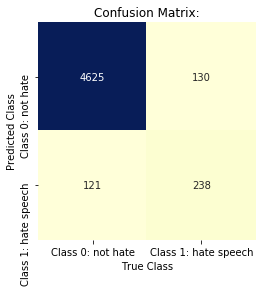

In [312]:
#want to reduce number of records predicted as 0 that are actually 1 
seaborn_confusion_matrix(y_val, lr_y_val_pred)

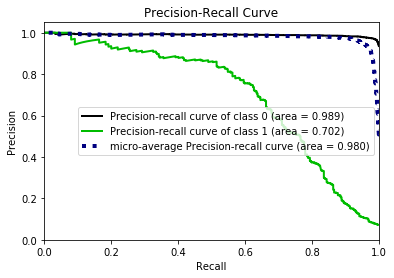

In [313]:
skplt.metrics.plot_precision_recall_curve(y_val, lr_y_val_prob)

Adjusted Accuracy: 0.9569808369182636
Adjusted Precision: 0.8797814207650273
Adjusted Recall: 0.44846796657381616
Adjusted F1 Score: 0.5940959409594097




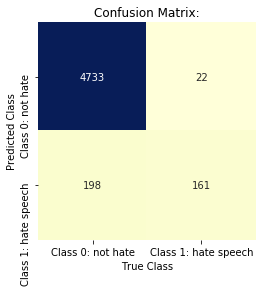

In [116]:
lr_pred_adj, cm = adjust_threshold_and_score(y_val, lr_y_val_prob, .2)

In [56]:
type(lr_pred_adj2)

list

In [64]:
lr_pred_df['adjusted class'] = lr_pred_adj

In [59]:
lr_pred_df.head()

,prob 0,prob 1,predicted class,actual class,adjusted_class
17498,0.73,0.27,0,0,0
9203,1.00,0.00,0,0,0
17380,0.99,0.01,0,0,0
25176,1.00,0.00,0,0,0
3828,1.00,0.00,0,0,0


In [65]:
lr_misclassified_df = lr_pred_df[lr_pred_df['predicted class'] != lr_pred_df['actual class']]
lr_misclassified_df.head()

,prob 0,prob 1,predicted class,actual class,adjusted class
12608,0.94,0.06,0,1,0
23876,0.45,0.55,1,0,0
28669,0.75,0.25,0,1,0
14414,0.49,0.51,1,0,0
2748,0.72,0.28,0,1,0


In [69]:
lr_misclassified_df.shape

(210, 5)

In [70]:
lr_misclassified2_df = lr_misclassified_df[lr_misclassified_df['adjusted class'] != lr_misclassified_df['actual class']]
lr_misclassified2_df.head()

,prob 0,prob 1,predicted class,actual class,adjusted class
12608,0.94,0.06,0,1,0
28669,0.75,0.25,0,1,0
2748,0.72,0.28,0,1,0
8202,0.89,0.11,0,1,0
13596,0.61,0.39,0,1,0


In [71]:
lr_misclassified2_df.shape

(173, 5)

In [72]:
df.tweet[12608]

'a reson why so many muslims might be'

In [73]:
df.lem_tweet[28669]

'nazi swastika ebay trump donaldtrump republicwhitepower'

In [74]:
df.tweet[2748]

'ever notice how much scum #trump hires ?'

##  Final Logistic Regression Model

In [79]:
X_model_countvect =  count_vect.fit_transform(X_model.lem_tweet)
X_test_countvect =  count_vect.transform(X_test.lem_tweet)

In [80]:
log = LogisticRegression(penalty = 'l1', C = 2.5, random_state= 10)

In [81]:
log.fit(X_model_countvect, y_model)

LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
lr_y_pred_test = log.predict(X_test_countvect)

In [83]:
lr_y_prob_test = log.predict_proba(X_test_countvect)

In [107]:
import eli5
from eli5 import explain_weights, explain_prediction
from eli5.formatters import format_as_html, format_as_text, format_html_styles, fields

In [108]:
eli5.show_weights(log, vec= count_vect, target_names= y_test, horizontal_layout=False)

Weight?,Feature
+9.915,allahsoil
+6.658,malevote
+6.550,discrimination
+6.500,canucks
+6.374,latent
+6.065,wew
+6.037,biblical
+5.903,happyholidays
+5.871,gu
+5.827,klan


In [109]:
for doc in y_test[:10]:
    expl = explain_prediction(log, doc, vec = count_vect, target_names = y_test, top_targets=1)
    show_html_expl(expl, force_weights=False)

AttributeError: 'int' object has no attribute 'lower'

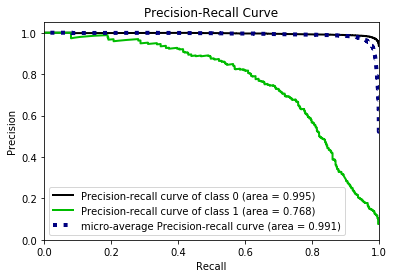

In [133]:
# skplt.metrics.plot_precision_recall_curve(y_test, lr_y_prob_test)

In [127]:
print_confusion_matrix(y_test, lr_y_pred_test)

,predicted 0,predicted 1
actual 0,5885,60
actual 1,180,268


Adjusted Accuracy: 0.9580791490692946
Adjusted Precision: 0.6890756302521008
Adjusted Recall: 0.7321428571428571
Adjusted F1 Score: 0.7099567099567099




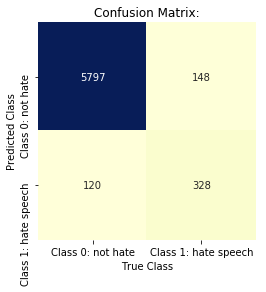

In [132]:
adjust_threshold_and_score(y_test, lr_y_prob_test, .8)

## Testing on Test Set

## SVM


In [129]:
svm_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', probability = True, random_state = 10), 
                            vectorization_list)
svm_results1 

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.93,0.93,0.93,0.93
Train F1,0.00,0.00,0.00,0.00
Train Precision,0.00,0.00,0.00,0.00
Train Recall,0.00,0.00,0.00,0.00
Validation Accuracy,0.93,0.93,0.93,0.93
Validation F1,0.00,0.00,0.00,0.00
Validation Precision,0.00,0.00,0.00,0.00
Validation Recall,0.00,0.00,0.00,0.00


In [ ]:
# svm_results1.to_csv('data/SVM_results.csv',mode = 'a',header ='column_names')

In [130]:
svm_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma='auto', class_weight = 'balanced', probability = True, random_state = 10), 
                            vectorization_list)
svm_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.07,0.07,0.07,0.08
Train F1,0.13,0.13,0.13,0.13
Train Precision,0.07,0.07,0.07,0.07
Train Recall,1.00,1.00,1.00,1.00
Validation Accuracy,0.07,0.07,0.07,0.08
Validation F1,0.13,0.13,0.13,0.13
Validation Precision,0.07,0.07,0.07,0.07
Validation Recall,1.00,1.00,1.00,1.00


In [ ]:
# svm_results2.to_csv('data/SVM_results.csv', mode = 'a',header ='column_names')

In [20]:
%run custom_functions_test.ipynb

In [11]:
# svm_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
#                             y_train, X_val.lem_tweet, y_val, 
#                             SVC(gamma='auto', random_state = 10), 
#                             vectorization_list, sampling = 'upsample')
# svm_results3 

KeyboardInterrupt: 

In [131]:
svm_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            SVC(gamma= 'auto', probability = True, random_state = 10), 
                            vectorization_list, sampling = 'downsample')
svm_results4 

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.51,0.84,0.80,0.54
Train F1,0.67,0.85,0.76,0.14
Train Precision,0.51,0.80,0.94,0.99
Train Recall,1.00,0.91,0.63,0.08
Validation Accuracy,0.10,0.74,0.89,0.93
Validation F1,0.13,0.32,0.45,0.13
Validation Precision,0.07,0.20,0.35,1.00
Validation Recall,1.00,0.89,0.60,0.07


In [ ]:
# svm_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
#                             y_train, X_val.lem_tweet, y_val, 
#                             SVC(gamma='auto', probability = True, random_state = 10), 
#                             vectorization_list, sampling = 'smote')
# svm_results5 

#### Grid Searching:

In [ ]:
X_train_tfid2 =  tfidf_ngram2.fit_transform(X_train.lemmatized_tweet)
X_val_tfid2 =  tfidf_ngram2.transform(X_val.lemmatized_tweet)

In [ ]:
svc = SVC

params = {
'C': [0.1,.2, .5, 0.8, 1, 1.5, 2.0, 3.0, 4.0, 5.0],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4],
'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:8, 1:2}]}

scores = ['accuracy','recall','precision','f1']

scv_rs = RandomizedSearchCV(rfc, param_distributions = parameters, scoring = scores, cv = 3, refit = 'f1')

In [ ]:
svm_rs.fit(X_train_tfid2, y_train)

In [ ]:
svm_rs.best_estimator_

# Random Forest

### Compare Multiple Methods:

In [ ]:
 RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10)

In [117]:
#Random Forest: compare vectorizers with lemmatizing; no hyperparameter tuning
rfc_results1 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), vectorization_list)
rfc_results1

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.95
Train F1,0.95,0.94,0.94,0.41
Train Precision,1.00,1.00,1.00,0.92
Train Recall,0.91,0.89,0.89,0.26
Validation Accuracy,0.96,0.95,0.96,0.93
Validation F1,0.61,0.55,0.58,0.20
Validation Precision,0.93,0.84,0.86,0.64
Validation Recall,0.45,0.41,0.44,0.12


In [118]:
# rfc_results1.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')


In [119]:
#Random Forest: compare vectorizers with lemmatizing and class weights balanced
rfc_results2 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10, class_weight = 'balanced'), 
                            vectorization_list)
rfc_results2

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.61
Train F1,0.95,0.94,0.94,0.25
Train Precision,1.00,0.98,0.98,0.14
Train Recall,0.91,0.90,0.91,0.91
Validation Accuracy,0.96,0.95,0.95,0.60
Validation F1,0.54,0.54,0.55,0.21
Validation Precision,0.98,0.84,0.84,0.12
Validation Recall,0.37,0.40,0.41,0.77


In [120]:
# rfc_results2.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [121]:
#Random Forest: compare vectorizers with lemmatizing and upsampling
rfc_results3 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'upsample')
rfc_results3

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,1.00,1.00,1.00,0.85
Train F1,1.00,1.00,1.00,0.83
Train Precision,1.00,1.00,1.00,0.94
Train Recall,1.00,1.00,1.00,0.75
Validation Accuracy,0.96,0.95,0.95,0.90
Validation F1,0.59,0.61,0.59,0.38
Validation Precision,0.93,0.75,0.77,0.33
Validation Recall,0.43,0.52,0.48,0.43


In [122]:
# rfc_results3.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [123]:
#Random Forest: compare vectorizers with lemmatizing and downsampling
rfc_results4 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'downsample')
rfc_results4

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.99,0.99,0.87
Train F1,0.99,0.99,0.99,0.85
Train Precision,1.00,1.00,1.00,0.97
Train Recall,0.98,0.98,0.98,0.76
Validation Accuracy,0.86,0.84,0.83,0.80
Validation F1,0.42,0.39,0.38,0.26
Validation Precision,0.30,0.27,0.26,0.18
Validation Recall,0.73,0.74,0.74,0.50


In [124]:
# rfc_results4.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

In [125]:
#Random Forest: compare vectorizers with lemmatizing and smote
rfc_results5 = wrapper_compare_vectorizations(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(random_state=10), 
                            vectorization_list, sampling = 'smote', sample_class = 'not majority')
rfc_results5

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,1.00,1.00,0.64
Train F1,0.96,0.99,0.99,0.25
Train Precision,0.95,0.98,0.99,0.15
Train Recall,0.96,0.99,0.99,0.86
Validation Accuracy,0.89,0.93,0.94,0.59
Validation F1,0.42,0.51,0.53,0.20
Validation Precision,0.34,0.52,0.56,0.12
Validation Recall,0.55,0.50,0.50,0.72


In [126]:
# rfc_results5.to_csv('data/RFC_results.csv',mode = 'a',header ='column_names')

### Grid-Searching For Best Fit for Count Vectorizer

In [132]:
np.random.seed(0)

In [133]:
X_train_countvect =  count_vect.fit_transform(X_train.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
# X_test_countvect = count_vect.transform(X_test.lem_tweet)

In [134]:
# rfc = RandomForestClassifier(random_state=10)

# parameters = {'n_estimators' : [40, 60, 80, 100, 120, 150],
# 'max_leaf_nodes' : [100, 200, 400, 600],
# 'random_state' : [10],
# 'max_depth': [5, 7, 10, 20, 30],
#  'verbose' : [0],
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:8, 1:2}] }
# # 'class_weight': ['balanced', 'balanced_subsample']}
          
# rfc_gs = GridSearchCV(rfc, param_grid=parameters, cv = 3)

In [135]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(10)
rfc = RandomForestClassifier(random_state=10)

parameters = {'n_estimators' : [40, 60, 80, 100, 120],
'max_leaf_nodes' : [100, 200, 300, 400],
'random_state' : [10],
'max_depth': [5, 6, 7, 8, 10, 20, 25, 30],
 'verbose' : [0],
# 'class_weight': [{0:5, 1:5}, {0:2, 1:8}, {0:4, 1:6}, {0:6, 1: 4}, {0:8, 1:2}]}
'class_weight': ['balanced', 'balanced_subsample']}

scores = ['accuracy','recall','precision','f1']

rfc_gs = RandomizedSearchCV(rfc, param_distributions = parameters, scoring = scores, cv = 3, refit = 'f1')

In [136]:
rfc_gs.fit(X_train_countvect, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [137]:
rfc_gs.best_params_

{'verbose': 0,
 'random_state': 10,
 'n_estimators': 80,
 'max_leaf_nodes': 200,
 'max_depth': 25,
 'class_weight': 'balanced'}

In [138]:
rfc_gs.best_score_

0.5800459005990697

In [139]:
rfc_df = pd.DataFrame(rfc_gs.cv_results_)
rfc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_verbose,param_random_state,param_n_estimators,param_max_leaf_nodes,param_max_depth,param_class_weight,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,3.175946,0.028908,0.258776,0.000477,0,10,60,300,20,balanced,...,0.575281,0.550092,0.025271,4,0.578629,0.550244,0.554713,0.561196,0.012462,4
1,1.066260,0.011570,0.131001,0.000324,0,10,40,100,10,balanced,...,0.380244,0.391458,0.058942,9,0.516854,0.417417,0.461791,0.465357,0.040673,9
2,5.248075,0.041720,0.380508,0.002024,0,10,80,200,25,balanced,...,0.614428,0.612758,0.031115,2,0.607341,0.571429,0.561364,0.580046,0.019735,1
3,2.644353,0.005158,0.309183,0.004145,0,10,100,400,10,balanced,...,0.458466,0.447967,0.032899,6,0.539945,0.493084,0.519928,0.517653,0.019199,6
4,1.503034,0.019810,0.244510,0.001119,0,10,80,300,7,balanced,...,0.382353,0.399490,0.037573,8,0.520354,0.465608,0.474603,0.486857,0.023971,8
5,0.821604,0.001232,0.185996,0.001016,0,10,60,100,5,balanced,...,0.361675,0.362493,0.034125,10,0.462913,0.419448,0.450237,0.444201,0.018251,10
6,8.243501,0.022627,0.534973,0.021809,0,10,100,300,30,balanced_subsample,...,0.672414,0.669043,0.015115,1,0.596698,0.574096,0.566586,0.579127,0.012798,2
7,1.928581,0.024586,0.359931,0.001668,0,10,120,300,6,balanced,...,0.385604,0.423771,0.052060,7,0.540952,0.483412,0.477707,0.500693,0.028565,7
8,5.314601,0.029668,0.367406,0.000181,0,10,80,100,25,balanced_subsample,...,0.570175,0.563284,0.009663,3,0.594000,0.574850,0.556745,0.575199,0.015211,3
9,2.386453,0.175902,0.196988,0.019729,0,10,40,200,20,balanced,...,0.499037,0.508564,0.026655,5,0.557143,0.526116,0.519559,0.534274,0.016392,5


In [140]:
rfc_df[rfc_df.rank_test_precision==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_verbose,param_random_state,param_n_estimators,param_max_leaf_nodes,param_max_depth,param_class_weight,...,split2_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
6,8.243501,0.022627,0.534973,0.021809,0,10,100,300,30,balanced_subsample,...,0.672414,0.669043,0.015115,1,0.596698,0.574096,0.566586,0.579127,0.012798,2


In [154]:
rfc2 = RandomForestClassifier(n_estimators = 80, max_leaf_nodes = 200, class_weight='balanced',
                            max_depth = 25, random_state=10)

In [155]:
rfc2.fit(X_train_countvect, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [157]:
y_rfc2_pred = rfc2.predict(X_train_countvect)

In [158]:
metrics.f1_score(y_train, y_rfc2_pred)

0.7455936148985699

In [161]:
rfc_X_train, rfc_X_val, rfc_y_train_pred, rfc_y_val_pred, rfc_y_val_prob, rfc_metrics, rfc_pred_df = \
\
wrapper_single_vectorization(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            RandomForestClassifier(n_estimators = 80, max_leaf_nodes = 200, 
                            class_weight = 'balanced', max_depth = 25, random_state=10), 
                            count_vect)

In [162]:
print_classification_report(y_val, rfc_y_val_pred)

              precision    recall  f1-score   support

    not hate       0.97      0.96      0.97      4755
 hate speech       0.54      0.62      0.58       359

    accuracy                           0.94      5114
   macro avg       0.75      0.79      0.77      5114
weighted avg       0.94      0.94      0.94      5114



In [163]:
# print confusion matrix    
pd.DataFrame(confusion_matrix(y_val, rfc_y_val_pred), index = ['actual 0','actual 1'], columns = ['predicted 0', 'predicted 1'])

,predicted 0,predicted 1
actual 0,4561,194
actual 1,135,224


In [164]:
rfc_y_val_prob

array([[0.48749982, 0.51250018],
       [0.5645008 , 0.4354992 ],
       [0.53219262, 0.46780738],
       ...,
       [0.61720324, 0.38279676],
       [0.57013572, 0.42986428],
       [0.55695865, 0.44304135]])

In [165]:
rfc_pred_df.head()

,prob 0,prob 1,predicted class,actual class
17498,0.49,0.51,1,0
9203,0.56,0.44,0,0
17380,0.53,0.47,0,0
25176,0.60,0.40,0,0
3828,0.66,0.34,0,0


In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# def plot_feature_importances(rfc2):
#     n_features = X_val_countvect.shape[1]
#     plt.figure(figsize=(8,8))
#     plt.barh(range(n_features), rfc2.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), countvect.values) 
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")

# plot_feature_importances(rfc2)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances(model):
    n_features = x_train_sc.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train_sc.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(rfc2)

# Word to Vec

### X-train pre-processing

In [141]:
X_train.tokenized_tweet.shape

(20455,)

In [167]:
X_train_token_list = list(X_train.tokenized_tweet)

In [168]:
X_train_token_sumlist = sum(X_train_token_list,[])

In [169]:
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

The unique number of words in the training dataset is: 28682


#### X-val pre-processing

In [170]:
X_val_token_list = list(X_val['tokenized_tweet'])
X_val_token_sumlist = sum(X_val_token_list,[])
X_val_unique_tokens = set(X_val_token_sumlist)

print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

The unique number of words in the validation dataset is: 11761


#### X-test pre-processing

In [171]:
X_test_token_list = list(X_test['tokenized_tweet'])
X_test_token_sumlist = sum(X_test_token_list,[])

X_test_unique_tokens = set(X_test_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

The unique number of words in the training dataset is: 13677


### Training Model

In [ ]:
from time import time
t = time()

w2v_model = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v_model.train(X_train_token_list, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

In [ ]:
w2v_model.save('data/w2v.model')

w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [172]:
w2v = gensim.models.Word2Vec.load('data/w2v.model')

In [148]:
w2v.corpus_count

20455

In [149]:
w2v_vocab= w2v.wv.vocab

In [ ]:
len(w2v_vocab)

In [ ]:
w2v.wv.vectors.shape

In [ ]:
w2v.wv['trump']

In [ ]:
w2v.wv.most_similar(['trump'])

In [ ]:
w2v.wv.most_similar(['racist'])

In [ ]:
w2v.wv.most_similar(positive=['lazy','black'])

In [ ]:
w2v.wv

In [ ]:
w2v.wv.get_keras_embedding

In [ ]:
w2v_X = w2v.wv.vectors

## Classification with Word2Vec

In [ ]:
sentence = X_train_token_list[1]
sentence

In [ ]:
X_train_w2v[20]

In [175]:
#create average vector for train and test from model
#returned list of numpy arrays are then stacked 

X_train_w2v = np.concatenate([avg_word_vectors(word, w2v) for word in X_train_token_list])

X_val_w2v = np.concatenate([avg_word_vectors(word, w2v) for word in X_val_token_list])

In [ ]:
X_train_w2v_2[10]

## Classification with Word Embeddings

In [184]:
%run custom_functions_test.ipynb

In [185]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

{'Train Accuracy': 0.84,
 'Train Precision': 0.29,
 'Train Recall': 0.85,
 'Train F1': 0.43,
 'Validation Accuracy': 0.84,
 'Validation Precision': 0.28,
 'Validation Recall': 0.86,
 'Validation F1': 0.43}

In [186]:
smote_w2v_model(X_train_w2v_2, y_train, X_val_w2v_2, y_val, RandomForestClassifier())

{'Train Accuracy': 1.0,
 'Train Precision': 0.99,
 'Train Recall': 1.0,
 'Train F1': 0.99,
 'Validation Accuracy': 0.93,
 'Validation Precision': 0.51,
 'Validation Recall': 0.58,
 'Validation F1': 0.54}

### Glove

In [ ]:
# from gensim.scripts.glove2word2vec import glove2word2vec

# glove_input_file = 'data/glove.twitter.27B.100d.txt'
# glove_output_file = 'data/glove.txt.word2vec'
# glove2word2vec(glove_input_file, glove_output_file)

In [187]:
glove_model = KeyedVectors.load_word2vec_format('data/glove.txt.word2vec', binary=False)

In [ ]:
w2v.most_similar('black')

In [ ]:
glove_model.most_similar('black')

In [ ]:
glove_model['love']

In [ ]:
X_train_token_list[0]

In [ ]:
# X_train_glove2 = np.empty((20455, 100))
# for sentence in X_train_token_list:
#     np.append(X_train_glove2, np.mean([glove_model[w] for w in sentence if w in glove_model]
#                    or [np.zeros(100)], axis=0))

In [188]:
X_train_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_train_token_list])
X_val_glove = np.concatenate([avg_word_vectors(w, glove_model) for w in X_val_token_list])

In [ ]:
X_train_w2v[10]

In [ ]:
X_train_w2v_2[10]

In [ ]:
X_train_glove[255]

In [191]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression())

{'Train Accuracy': 0.88,
 'Train Precision': 0.03,
 'Train Recall': 0.02,
 'Train F1': 0.02,
 'Validation Accuracy': 0.88,
 'Validation Precision': 0.03,
 'Validation Recall': 0.03,
 'Validation F1': 0.03}

##  Testing Scraped Trump Tweets

In [ ]:
trump_df= pd.read_csv('data/cleaned-trump-tweet.csv')
trump_df.head()

In [ ]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)

In [ ]:
logreg = LogisticRegression(class_weight='balanced')

In [ ]:
logreg.fit(X_train_countvect, y_train_up)

In [ ]:
X_trump = count_vect.transform(trump_df.lem_tweet)

In [ ]:
X_trump = X_trump.toarray()

In [ ]:
X_trump.shape

In [ ]:
y_trump_predict = logreg.predict(X_trump)

In [ ]:
y_trump_predict

In [ ]:
trump_df['predictions'] = y_trump_predict

In [ ]:
y_trump_predict_prob = logreg.predict_proba(X_trump)

In [ ]:
y_trump_predict_prob = pd.DataFrame(y_trump_predict_prob)

In [ ]:
trump_df['predict_probability'] = y_trump_predict_prob[0]

In [ ]:
trump_df = trump_df[['tweet','predictions', 'predict_probability']]


In [ ]:
trump0 = trump_df[trump_df.predictions == 0]

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
trump0.tweet

In [ ]:
trump_df

In [ ]:
trump_df[trump_df.predictions == 0]

In [ ]:
trump1 = trump_df[trump_df.predictions == 1]

In [ ]:
trump1.tweet